[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


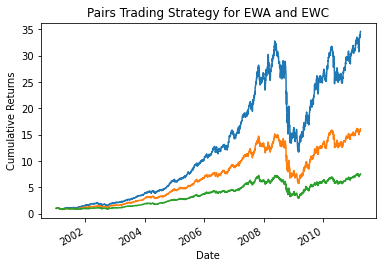

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf
# Load the historical data for AAPL and LRCX
ewa = yf.download('EWA', start='2001-01-10', end='2011-04-05')
ewc = yf.download('EWC', start='2001-01-10', end='2011-04-05')

# Create a new DataFrame to store the trading signals
signals = pd.DataFrame(index=ewa.index)
signals['signal_1.0'] = 0.0
signals['signal_1.5'] = 0.0
signals['signal_2.0'] = 0.0

# Compute the spread between AAPL and LRCX
spread = ewa['Adj Close'] - ewc['Adj Close']

# Compute the rolling mean and standard deviation of the spread
spread_mean = spread.rolling(window=30).mean()
spread_std = spread.rolling(window=30).std()

# Compute the daily returns of AAPL and LRCX
ewa_returns = ewa['Adj Close'].pct_change()
ewc_returns = ewc['Adj Close'].pct_change()
stds=['1.0','1.5','2.0']
for std_up in stds:
# Generate trading signals when the spread is above or below a certain threshold
    signals['signal_'+std_up][spread > (spread_mean + float(std_up) * spread_std)] = -1.0
    signals['signal_'+std_up][spread < (spread_mean - float(std_up) * spread_std)] = 1.0

# Compute the daily returns of the trading strategy
    signals['returns_'+std_up] = signals['signal_'+std_up].shift(1) * ewa_returns + (1 - signals['signal_'+std_up].shift(1)) * ewc_returns
    signals['cumulative_returns_'+std_up]= (1 + signals['returns_'+std_up]).cumprod()

# Plot the cumulative returns of the trading strategy
signals['cumulative_returns_1.0'].plot()
signals['cumulative_returns_1.5'].plot()
signals['cumulative_returns_2.0'].plot()

plt.title('Pairs Trading Strategy for EWA and EWC')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()